In [15]:
from collections import Counter

In [80]:
def cacualte(sequence, width, height):
    layers = []
    
    per_layer = width * height
    
    number_of_layers = int(len(sequence)/ per_layer)
    
    smallest_count = None
    smallest_index = None
    
    for i in range(number_of_layers):
        layer = (sequence[i*per_layer:(i+1)*per_layer])
        counter = Counter(layer)
        
        if smallest_count == None:
            smallest_count = counter['0']
            smallest_index = i
        else:
            if counter['0'] < smallest_count:
                smallest_count = counter['0']
                smallest_index = i
        
        layers.append(counter)
    
    return layers[smallest_index]

In [73]:
sequence = '123456789012'
width = 3
height = 2


In [74]:
layers = cacualte(sequence, width, height)
layers

1 0


Counter({'1': 1, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1})

In [75]:
layers['1'] * layers['2']

1

In [76]:
sequence = '123456789012'
width = 25
height = 6

with open('./data/7.txt') as f:
    sequence = f.readlines()[0][:-1]

In [81]:
layers = cacualte(sequence, width, height)
layers

Counter({'2': 125, '1': 20, '0': 5})

In [78]:
layers['1'] * layers['2']

2500

In [147]:
class Pixel:
    
    def __init__(self):
        self.layers = []
    
    def add_layer(self, pixel):
        self.layers.append(pixel)
        
    def draw(self):
        for layer in self.layers:
            if layer == '2':
                pass
            if layer == '1':
                return 0
            if layer == '0':
                return 1
        return 0

            
def draw(sequence, width, height):
    grid = []
    per_layer = width * height
    
    for i in range(per_layer):
        grid.append(Pixel())
    
    number_of_layers = int(len(sequence)/ per_layer)
    
    smallest_count = None
    smallest_index = None
    
    for i in range(number_of_layers):
        layer = (sequence[i*per_layer:(i+1)*per_layer])
        for j, pixel in enumerate(layer):
            grid[j].add_layer(pixel)
            
    for i in range(height):
        yield (([grid[j+(i*width)].draw() for j in range(width)]))

In [142]:
sequence = '0222112222120000'
width = 2
height = 2
list(draw(sequence, width, height))

[[1, 0], [0, 1]]

In [143]:
width = 25
height = 6
with open('./data/7.txt') as f:
    sequence = f.readlines()[0][:-1]
    
a = list(draw(sequence, width, height))

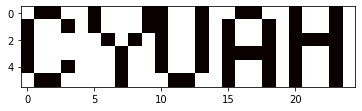

In [145]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()